In [1]:
pip install scikit-learn seaborn
pip install torchvision

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim

In [2]:


# Data Loading and Preprocessing to standardize images 
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

#dataset directory 
dataset = ImageFolder(root='Downloads/EuroSAT_RGB', transform=transform)

# Train-Test Split
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# Create Data Loaders to iterate batches of size 32 over training
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)







Here, we load the file directory from my local machine and store it as "dataset." We then split the data set into training and testing and create data loaders to iterate batches of size 32 over training.


In [3]:
#DEFINE THE INITIAL NEURAL NETWORK MODEL

import torch.nn as nn

class SimpleClassifier(nn.Module):
    def __init__(self, num_classes):
        super(SimpleClassifier, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(16 * 112 * 112, 128)
        self.fc2 = nn.Linear(128, num_classes)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


We define our initial NN model with: 

self.conv1: A convolutional layer with 3 input channels (for RGB images), 16 output channels, a kernel size of 3x3, a stride of 1, and a padding of 1.

self.relu: A rectified linear unit (ReLU) activation function.

self.maxpool: A max-pooling layer with a kernel size of 2x2.

self.fc1: A fully connected (linear) layer that takes the flattened output from the convolutional layers and has 16 * 112 * 112 input features and 128 output features.

self.fc2: Another fully connected layer that takes the 128 features from the previous layer and outputs num_classes features.

def forward(self, x): The forward method is where the forward pass computation of the model happens. It takes an input tensor x.

x = self.conv1(x): Apply the convolutional layer.

x = self.relu(x): Apply ReLU activation.

x = self.maxpool(x): Apply max-pooling.

x = x.view(x.size(0), -1): Flatten the tensor.

x = self.fc1(x): Apply the first fully connected layer.

x = self.relu(x): Apply ReLU activation.

x = self.fc2(x): Apply the second fully connected layer.

return x: Return the final output tensor, which represents the class scores for each input image.

In [4]:
# Inside the main script 
#run 1 with epoch =2, batch size= 32, lr=.001; test accuracy of .69

# Define Neural Network Model
num_classes = len(dataset.classes)  # Number of classes in your dataset
num_epochs = 2 #Number of epochs/times you run through the nn
model = SimpleClassifier(num_classes)

# Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Evaluation and Accuracy Calculation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Overall test-set accuracy: {accuracy:.2f}')


Overall test-set accuracy: 0.69


With our first run using the specificed hyperparameters, we achieve a test-set accuracy of .69. Perhaps we can adjust hyperparameters such as epoch, batch size, and learning rate to make the model more complicated to achieve a better test-set accuracy.


In [6]:

#run 2 with epoch =3, batch size= 64, lr=.002

# Create Data Loaders to iterate batches over training
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Define Neural Network Model
num_classes = len(dataset.classes)  # Number of classes in your dataset
num_epochs = 3 #Number of epochs/times you run through the nn
model = SimpleClassifier(num_classes)

# Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.002)

# Training Loop
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Evaluation and Accuracy Calculation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Overall test-set accuracy: {accuracy:.2f}')


Overall test-set accuracy: 0.68


Adjusting the hyperparameters to reflect a more complicated model seemed to make the model worse in classifying our images. Perhaps adjusting hyperparameters like increasing output channels and kernal sizes, adding more convolutional layers, and more aggresive down sampling may help increase the test-set accuracy.


In [16]:
#MORE COMPLICATED NEURAL NETWORK MODEL WITH INCREASE OUTPUT CHANNELS AND KERNEL SIZE IN CONVOLUTIONAL LAYER
#MORE AGGRESSIVE DOWN SAMPLING, NEW CONVOLUTIONAL LAYER, AND ADJUSTING FULLY CONNECTED LAYER INPUT SIZE 

import torch.nn as nn

class ComplexClassifier(nn.Module):
    def __init__(self, num_classes):
        super(ComplexClassifier, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 56 * 56, 256)  # Adjust based on conv2 output size
        self.fc2 = nn.Linear(256, num_classes)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


In [17]:
# Inside the main script 
#run 3 with more complicated NN, with epoch =2, batch size= 32, lr=.001

# Create Data Loaders to iterate batches over training
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Define Neural Network Model
num_classes = len(dataset.classes)  # Number of classes in your dataset
num_epochs = 2 #Number of epochs/times you run through the nn
model = SimpleClassifier(num_classes)

# Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Evaluation and Accuracy Calculation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Overall test-set accuracy: {accuracy:.2f}')

Overall test-set accuracy: 0.68


Adjusting these hyperparameters did not seem to make the model perform better in classifying these different images. Maybe plotting example images from the test set with predicted classes may give us insight into what our neural network is lacking in:

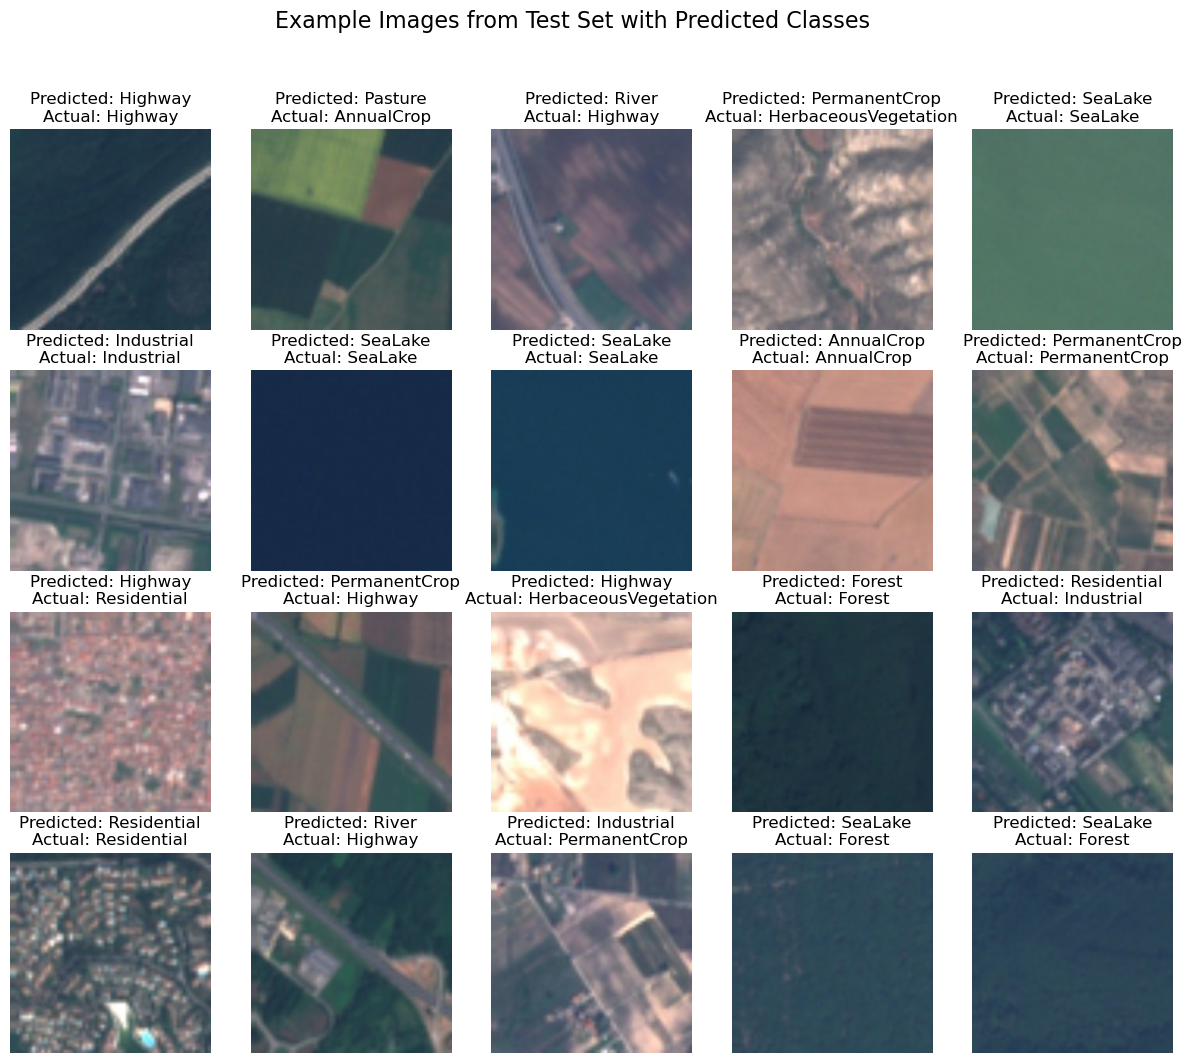

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Visualization
model.eval()
num_images_to_show = 20

# Calculate the number of rows needed
num_rows = (num_images_to_show + 4) // 5

# Set up a figure and axes
fig, axes = plt.subplots(num_rows, 5, figsize=(15, 3 * num_rows))
fig.suptitle("Example Images from Test Set with Predicted Classes", fontsize=16)

with torch.no_grad():
    for i, (inputs, labels) in enumerate(test_loader):
        if i >= num_images_to_show:
            break
        
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        
        image = inputs[0].permute(1, 2, 0)  # Rearrange channels
        image = (image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])).clamp(0, 1)  # Denormalize
        
        row_idx = i // 5
        col_idx = i % 5
        ax = axes[row_idx, col_idx]
        ax.imshow(image)
        ax.set_title(f"Predicted: {dataset.classes[predicted[0]]}\nActual: {dataset.classes[labels[0]]}")
        ax.axis('off')

# Hide any remaining empty subplots
for i in range(num_images_to_show, num_rows * 5):
    row_idx = i // 5
    col_idx = i % 5


To the human eye, the images above do not seem to give much insight into what may be causing our model to mis classify certain images. Let's utilize a confusion matrix to develop further insight into what our neural network is doing:

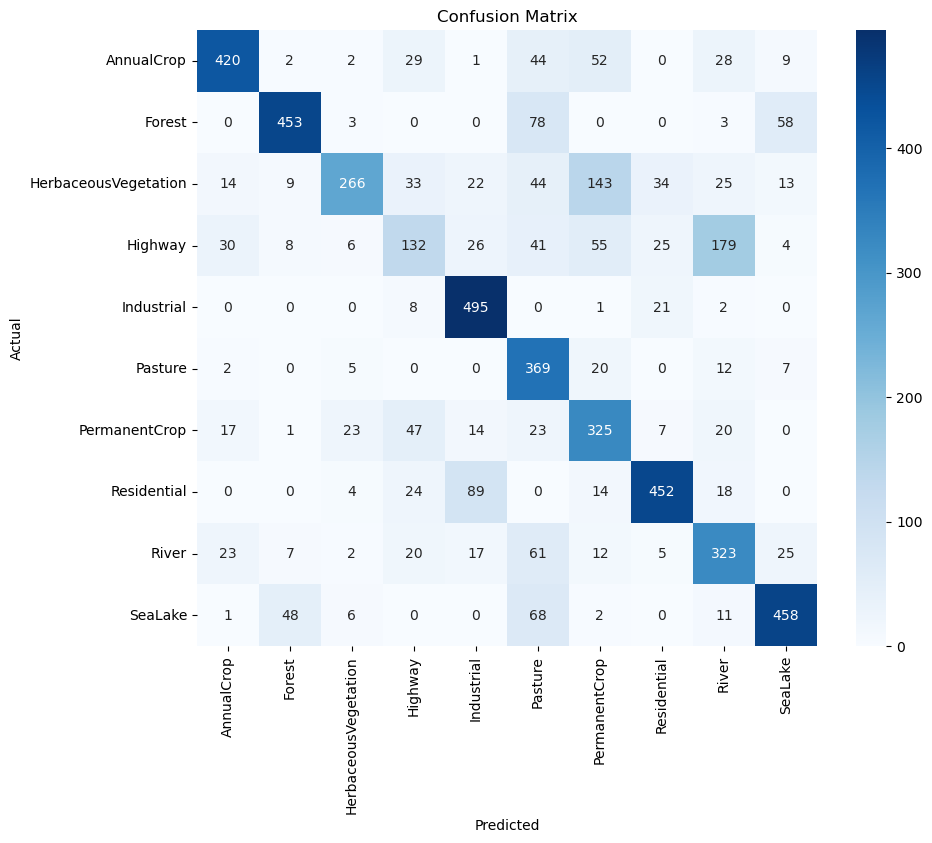

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Evaluation and Confusion Matrix
model.eval()
all_predicted = []
all_actual = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_predicted.extend(predicted.tolist())
        all_actual.extend(labels.tolist())

classes = dataset.classes
confusion = confusion_matrix(all_actual, all_predicted)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


From the confusion matrix above, it seems that our neural network model is predicting "Highway" as "River" and "HerbaceousVegetation" as "PermanentCrop." This insight makes sense because the neural network may be picking up distinct features of a highway (such as a long strip of road) and classifying it as a feature of a river. Similarly, the "camoflouge looking" pattern of HerbaceousVegetation may accidentally be classified as an feature of PermanentCrop. 